In [1]:
from __future__ import print_function, division
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from PIL import Image
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import os

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

In [2]:
input_dir = "/media/schartz/disk1/Users/Schartz/code/small_datasets/"
df = pd.read_csv(input_dir+"devnagri_mnist.csv")

In [3]:
df.shape

(92000, 1025)

In [4]:
# df2=df.groupby("character",as_index=False).count()

In [5]:
# import pandas
# from sklearn import preprocessing 

# le = preprocessing.LabelEncoder()
# df2['character'] = le.fit_transform(df2['character'])

In [6]:
 df.head(10)

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [7]:
df['character'].unique()                  ## 46 unique values, 46 classes

array(['character_01_ka', 'character_02_kha', 'character_03_ga',
       'character_04_gha', 'character_05_kna', 'character_06_cha',
       'character_07_chha', 'character_08_ja', 'character_09_jha',
       'character_10_yna', 'character_11_taamatar', 'character_12_thaa',
       'character_13_daa', 'character_14_dhaa', 'character_15_adna',
       'character_16_tabala', 'character_17_tha', 'character_18_da',
       'character_19_dha', 'character_20_na', 'character_21_pa',
       'character_22_pha', 'character_23_ba', 'character_24_bha',
       'character_25_ma', 'character_26_yaw', 'character_27_ra',
       'character_28_la', 'character_29_waw', 'character_30_motosaw',
       'character_31_petchiryakha', 'character_32_patalosaw',
       'character_33_ha', 'character_34_chhya', 'character_35_tra',
       'character_36_gya', 'digit_0', 'digit_1', 'digit_2', 'digit_3',
       'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9'],
      dtype=object)

In [8]:
X=df.iloc[:,:-1]/255
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)





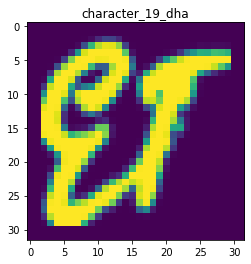

In [9]:
X_train = X_train.values.reshape((X_train.shape[0],32, 32, 1) )


def imshow(ix):
    plt.imshow(np.squeeze(X_train[ix,:,:,0:1])) 
    plt.title(y_train[ix])
    plt.show()
    
imshow(46) 

In [10]:
X_train.shape

(64400, 32, 32, 1)

In [11]:
X_train[0].shape

(32, 32, 1)

In [12]:
X_test = X_test.values.reshape((X_test.shape[0],32, 32, 1) )

In [13]:
X_test.shape

(27600, 32, 32, 1)

In [14]:
print(y_train.shape)
print(y_test.shape)

(64400,)
(27600,)


In [15]:
### label encoder on y_train and y_test

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

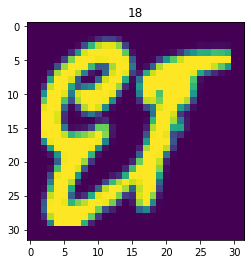

In [16]:
### after label encoded

def imshow(ix):
    plt.imshow(np.squeeze(X_train[ix,:,:,0:3])) 
    plt.title(y_train[ix])
    plt.show()
    
imshow(46) 

In [17]:
train_Aug = torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)),       
                                            torchvision.transforms.ToTensor()])
test_Aug = torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)),  
                                           torchvision.transforms.ToTensor()])

In [18]:
class MyDataset():
    def __init__(self ,X_train , y_train, transforms=None):

        self.y_train = y_train
        self.X_train = X_train
        self.transforms = transforms

    def __getitem__(self,idx):
        label = self.y_train[idx]

        image = Image.fromarray((np.squeeze(self.X_train[idx,:,:,0:3]))).convert('RGB')
        
        if self.transforms is not None:
              image = self.transforms(image)
        return image, label
    
    def __len__(self):
        return len(self.y_train)
    
    
dataset = MyDataset(X_train , y_train, train_Aug)    

In [19]:
######split for validation set


from torch.utils.data import Dataset, DataLoader ,random_split
valid_no = int(len(dataset)*0.2) 
trainset ,valset  = random_split( dataset , [len(dataset) -valid_no  ,valid_no])

print(len(trainset), len(valset))

trainloader = torch.utils.data.DataLoader(trainset, batch_size=50, shuffle=True, num_workers=0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

51520 12880
cuda


In [20]:
my_resnet_model = models.resnet34(pretrained=True)

num_features = my_resnet_model.fc.in_features
my_resnet_model.fc = nn.Linear(num_features, 46)

In [21]:
my_resnet_model = my_resnet_model.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(my_resnet_model.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [22]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/devnagri_mnist_experiment_1')


model_dir = '/media/schartz/disk1/Users/Schartz/code/small_datasets'
num_epochs = 5
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0): 
        exp_lr_scheduler.step()
        my_resnet_model.train()  # Set model to training mode
        
        for inputs, labels in trainloader:
                inputs = inputs.to(device) 
                labels = labels.to(device)
                
                optimizer_ft.zero_grad()
                outputs = my_resnet_model(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer_ft.step()
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # correct += (outputs == labels).float().sum()
        print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1,num_epochs, loss.item(), correct/total))
        
        torch.save(my_resnet_model.state_dict(), os.path.join(model_dir, 'epoch-{}.pt'.format(epoch)))

print('Finished Training')

/media/schartz/disk1/work/_caches/virtualenvwrapper/pytorch14/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:118: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch 1/5, Loss: 0.065, Accuracy: 0.788
Epoch 1/5, Loss: 0.272, Accuracy: 0.860
Epoch 1/5, Loss: 0.228, Accuracy: 0.893
Epoch 1/5, Loss: 0.295, Accuracy: 0.913
Epoch 1/5, Loss: 0.339, Accuracy: 0.926
Epoch 1/5, Loss: 0.144, Accuracy: 0.936
Epoch 1/5, Loss: 0.018, Accuracy: 0.944
Epoch 1/5, Loss: 0.312, Accuracy: 0.950
Epoch 1/5, Loss: 0.015, Accuracy: 0.955
Epoch 1/5, Loss: 0.018, Accuracy: 0.959
Epoch 1/5, Loss: 0.010, Accuracy: 0.962
Epoch 1/5, Loss: 0.097, Accuracy: 0.965
Epoch 1/5, Loss: 0.005, Accuracy: 0.967
Epoch 1/5, Loss: 0.241, Accuracy: 0.969
Epoch 1/5, Loss: 0.048, Accuracy: 0.971
Epoch 1/5, Loss: 0.380, Accuracy: 0.973
Epoch 1/5, Loss: 0.006, Accuracy: 0.974
Epoch 1/5, Loss: 0.199, Accuracy: 0.975
Epoch 1/5, Loss: 0.005, Accuracy: 0.976
Epoch 1/5, Loss: 0.029, Accuracy: 0.977
Epoch 1/5, Loss: 0.014, Accuracy: 0.978
Epoch 1/5, Loss: 0.141, Accuracy: 0.979
Epoch 1/5, Loss: 0.007, Accuracy: 0.980
Epoch 1/5, Loss: 0.071, Accuracy: 0.980
Epoch 1/5, Loss: 0.032, Accuracy: 0.981


KeyboardInterrupt: 

In [ ]:
classes = df.character.unique()

In [ ]:
len(classes)

In [28]:
def y_labels(df):
    classes= []
    classes.append(df.character.unique())
    return classes

In [29]:
src = (ImageList.from_csv(input_dir,"data.csv")
        .split_by_rand_pct()
        .label_from_func(y_labels))

FileNotFoundError: [Errno 2] File C:\Users\91958\devnagari\0data.csv does not exist: 'C:\\Users\\91958\\devnagari\\0data.csv'